# Выбор локации для скважины

**Описание проекта**

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.


**Описание данных**

Данные представлены для трех регионов и находятся в файлах:
- `/datasets/geo_data_0.csv`;
- `/datasets/geo_data_1.csv`;
- `/datasets/geo_data_2.csv`.

В каждом файле имеются следующие признаки:
- `id` - уникальный идентификатор скважины;
- `f0` - признак точки №0;
- `f1` - признак точки №1;
- `f2` - признак точки №2;
- `product` - объем запасов в скважине (тыс. баррелей).


**План проекта**

1. Загрузить файлы
2. Провести предварительный обзор данных;
3. Провести предобработку данных;
4. Провести исследовательский анализ данных для задачи №1;
5. Провести корреляционный анализ для задачи №1
6. Построить и проанализировать модели машинного обучения для задачи №1;
7. Провести исследовательский анализ данных для задачи №2;
8. Провести корреляционный анализ для задачи №2;
9. Построить и проанализировать модели машинного обучения для задачи №2;
10. Сделать выводы.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-файлов" data-toc-modified-id="Загрузка-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка файлов</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Датасет-geo_data_0" data-toc-modified-id="Датасет-geo_data_0-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Датасет <code>geo_data_0</code></a></span></li><li><span><a href="#Датасет-geo_data_1" data-toc-modified-id="Датасет-geo_data_1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Датасет <code>geo_data_1</code></a></span></li><li><span><a href="#Датасет-geo_data_2" data-toc-modified-id="Датасет-geo_data_2-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Датасет <code>geo_data_2</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Преодобработка-данных" data-toc-modified-id="Преодобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Преодобработка данных</a></span><ul class="toc-item"><li><span><a href="#Датасет-geo_data_0" data-toc-modified-id="Датасет-geo_data_0-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Датасет <code>geo_data_0</code></a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Дубликаты</a></span><ul class="toc-item"><li><span><a href="#Явные-дубликаты" data-toc-modified-id="Явные-дубликаты-3.1.1.1"><span class="toc-item-num">3.1.1.1&nbsp;&nbsp;</span>Явные дубликаты</a></span></li><li><span><a href="#Неявные-дубликаты" data-toc-modified-id="Неявные-дубликаты-3.1.1.2"><span class="toc-item-num">3.1.1.2&nbsp;&nbsp;</span>Неявные дубликаты</a></span></li></ul></li></ul></li><li><span><a href="#Датасет-geo_data_1" data-toc-modified-id="Датасет-geo_data_1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Датасет <code>geo_data_1</code></a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Дубликаты</a></span><ul class="toc-item"><li><span><a href="#Явные-дубликаты" data-toc-modified-id="Явные-дубликаты-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Явные дубликаты</a></span></li><li><span><a href="#Неявные-дубликаты" data-toc-modified-id="Неявные-дубликаты-3.2.1.2"><span class="toc-item-num">3.2.1.2&nbsp;&nbsp;</span>Неявные дубликаты</a></span></li></ul></li></ul></li><li><span><a href="#Датасет-geo_data_2" data-toc-modified-id="Датасет-geo_data_2-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Датасет <code>geo_data_2</code></a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Дубликаты</a></span><ul class="toc-item"><li><span><a href="#Явные-дубликаты" data-toc-modified-id="Явные-дубликаты-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Явные дубликаты</a></span></li><li><span><a href="#Неявные-дубликаты" data-toc-modified-id="Неявные-дубликаты-3.3.1.2"><span class="toc-item-num">3.3.1.2&nbsp;&nbsp;</span>Неявные дубликаты</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Датасет-geo_data_0" data-toc-modified-id="Датасет-geo_data_0-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Датасет <code>geo_data_0</code></a></span></li><li><span><a href="#Датасет-geo_data_1" data-toc-modified-id="Датасет-geo_data_1-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Датасет <code>geo_data_1</code></a></span></li><li><span><a href="#Датасет-geo_data_2" data-toc-modified-id="Датасет-geo_data_2-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Датасет <code>geo_data_2</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Корреляционный анализ</a></span><ul class="toc-item"><li><span><a href="#Датасет-geo_data_0" data-toc-modified-id="Датасет-geo_data_0-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Датасет <code>geo_data_0</code></a></span></li><li><span><a href="#Датасет-geo_data_1" data-toc-modified-id="Датасет-geo_data_1-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Датасет <code>geo_data_1</code></a></span></li><li><span><a href="#Датасет-geo_data_2" data-toc-modified-id="Датасет-geo_data_2-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Датасет <code>geo_data_2</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Датасет-geo_data_0" data-toc-modified-id="Датасет-geo_data_0-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Датасет <code>geo_data_0</code></a></span></li><li><span><a href="#Датасет-geo_data_1" data-toc-modified-id="Датасет-geo_data_1-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Датасет <code>geo_data_1</code></a></span></li><li><span><a href="#Датасет-geo_data_2" data-toc-modified-id="Датасет-geo_data_2-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Датасет <code>geo_data_2</code></a></span></li><li><span><a href="#Сравнение-регионов" data-toc-modified-id="Сравнение-регионов-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Сравнение регионов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчет-прибыли-и-рисков" data-toc-modified-id="Расчет-прибыли-и-рисков-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Расчет прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Подготовка-к-расчету" data-toc-modified-id="Подготовка-к-расчету-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Подготовка к расчету</a></span></li><li><span><a href="#Выбор-скважин-с-максимальными-значениями" data-toc-modified-id="Выбор-скважин-с-максимальными-значениями-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Выбор скважин с максимальными значениями</a></span></li><li><span><a href="#Расчет-прибыли" data-toc-modified-id="Расчет-прибыли-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Расчет прибыли</a></span></li><li><span><a href="#Расчет-рисков" data-toc-modified-id="Расчет-рисков-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Расчет рисков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Загрузка файлов

In [1]:
!pip install phik -q
!pip install shap -q
!pip install -U scikit-learn -q
#!pip uninstall matplotlib -y -q
!pip install "matplotlib==3.5.0" -q

In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import warnings
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler)

from sklearn.metrics import (
    r2_score,
    mean_squared_error, 
    mean_absolute_error)

from scipy import stats as st

from itertools import product

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

RANDOM_STATE = 42

In [2]:
try:
    geo_data_0 = pd.read_csv('./datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('./datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('./datasets/geo_data_2.csv')
except:
    print('Problems with local folder!')
    geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

Problems with local folder!


## Обзор данных

In [4]:
def get_start_info(data):
    display(data.head())
    data.info()
    display(data.describe().T)

### Датасет `geo_data_0`

In [5]:
get_start_info(geo_data_0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


### Датасет `geo_data_1`

In [6]:
get_start_info(geo_data_1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


### Датасет `geo_data_2`

In [7]:
get_start_info(geo_data_2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


### Вывод

В ходе предварительного обзора можно сделать следующие выводы:
- Датасет `geo_data_0`:
    - Всего в датасете 10000 строк и 5 столбцов;
    - Названия столбцов приведены к единому стилю;
    - Явные пропуски не обнаружены;
    - Данные имеют верный тип;
    - Необходимо проверить данные на дубликаты;
    - Явных выбросов не обнаружено.
    
- Датасет `geo_data_1`:
    - Всего в датасете 10000 строк и 5 столбцов;
    - Названия столбцов приведены к единому стилю;
    - Явные пропуски не обнаружены;
    - Данные имеют верный тип;
    - Необходимо проверить данные на дубликаты;
    - Явных выбросов не обнаружено.
    
- Датасет `geo_data_2`:
    - Всего в датасете 10000 строк и 5 столбцов;
    - Названия столбцов приведены к единому стилю;
    - Явные пропуски не обнаружены;
    - Данные имеют верный тип;
    - Необходимо проверить данные на дубликаты;
    - Явных выбросов не обнаружено.

Данные являются пригодными для исследования.

## Преодобработка данных

In [8]:
def find_explicit_duplicates(df):
    print(f'Количество дубликатов в датасете {df.duplicated().sum()}')
    print(f'Количество дубликатов в столбце `id` {df.duplicated("id").sum()}')

def find_implicit_duplicates(df):
    print('Уникальные значение в датасете\n')
    cat_cols = list(df.select_dtypes(include='object').columns)
    for col in cat_cols:
        print(f'{col}: {df[col].unique()}')

### Датасет `geo_data_0`

#### Дубликаты

##### Явные дубликаты

In [9]:
find_explicit_duplicates(geo_data_0)

Количество дубликатов в датасете 0
Количество дубликатов в столбце `id` 10


In [10]:
geo_data_0.drop_duplicates('id', inplace=True)
find_explicit_duplicates(geo_data_0)

Количество дубликатов в датасете 0
Количество дубликатов в столбце `id` 0


##### Неявные дубликаты

In [11]:
find_implicit_duplicates(geo_data_0)

Уникальные значение в датасете

id: ['txEyH' '2acmU' '409Wp' ... '3rnvd' '7kl59' '1CWhH']


### Датасет `geo_data_1`

#### Дубликаты

##### Явные дубликаты

In [12]:
find_explicit_duplicates(geo_data_1)

Количество дубликатов в датасете 0
Количество дубликатов в столбце `id` 4


In [13]:
geo_data_1.drop_duplicates('id', inplace=True)
find_explicit_duplicates(geo_data_1)

Количество дубликатов в датасете 0
Количество дубликатов в столбце `id` 0


##### Неявные дубликаты

In [14]:
find_implicit_duplicates(geo_data_1)

Уникальные значение в датасете

id: ['kBEdx' '62mP7' 'vyE1P' ... '09gWa' 'rqwUm' 'relB0']


### Датасет `geo_data_2`

#### Дубликаты

##### Явные дубликаты

In [15]:
find_explicit_duplicates(geo_data_2)

Количество дубликатов в датасете 0
Количество дубликатов в столбце `id` 4


In [16]:
geo_data_2.drop_duplicates('id', inplace=True)
find_explicit_duplicates(geo_data_2)

Количество дубликатов в датасете 0
Количество дубликатов в столбце `id` 0


##### Неявные дубликаты

In [17]:
find_implicit_duplicates(geo_data_2)

Уникальные значение в датасете

id: ['fwXo0' 'WJtFt' 'ovLUW' ... 'tKPY3' 'nmxp2' 'V9kWn']


### Вывод

В ходе предобработки данных проделаны следующие шаги:
- Датасет `geo_data_0`:
    - Обработаны дубликаты (вероятно, техническая проблема).
- Датасет `geo_data_1`:
    - Обработаны дубликаты (вероятно, техническая проблема).
- Датасет `geo_data_2`:
    - Обработаны дубликаты (вероятно, техническая проблема).

## Исследовательский анализ данных

Проведем исследовательский анализ данных на каждом датасете и проверим распределение признаков.

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def num_hist_box(data, feature):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,7))
    fig.suptitle(f'Распределение по {feature}')
    
    #Строим гистограмму
    sns.histplot(data, bins=50, x=feature, kde=True, ax=ax[0])
    ax[0].set(
        title=f'Гистограмма распределения по {feature}',
        xlabel=f'Значение {feature}',
        ylabel='Количество наблюдений')
    ax[0].grid()
    
    #Строим график разброса
    sns.boxplot(x=data[feature], ax=ax[1])
    ax[1].set(
        title=f'График разброса значений по {feature}',
        xlabel=f'Значение {feature}')
    
    plt.subplots_adjust(hspace = 0.5)

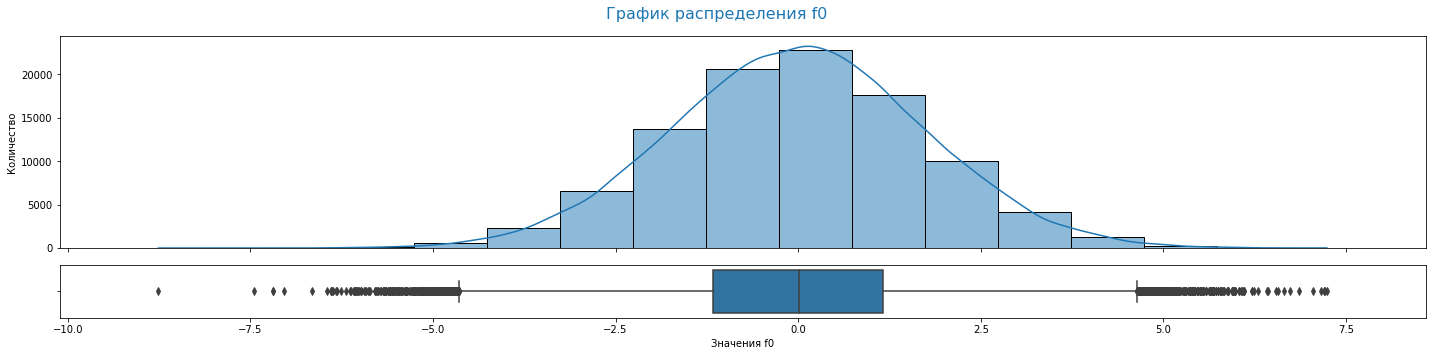

In [8]:
fig, (ax_main, ax_box) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (.8, .2)}
)
fig.set_size_inches((20, 5))
sns.histplot(x=geo_data_2["f0"], kde=True, discrete=True, ax=ax_main).set(ylabel="Количество")
sns.boxplot(x=geo_data_2["f0"], ax=ax_box)
plt.suptitle("График распределения f0", size=16, color="C0")
plt.xlabel("Значения f0")
# ax_box.set_xticks(range(0, 105, 5))
plt.tight_layout()
plt.show()

### Датасет `geo_data_0`

,count,mean,std,min,25%,50%,75%,max
f0,99990.0,0.500454,0.871844,-1.408605,-0.072572,0.502405,1.073626,2.362331
f1,99990.0,0.250141,0.504430,-0.848218,-0.200877,0.250252,0.700640,1.343769
f2,99990.0,2.502629,3.248149,-12.088328,0.287784,2.515969,4.715035,16.003790
product,99990.0,92.499684,44.288304,0.000000,56.497069,91.847928,128.563699,185.364347


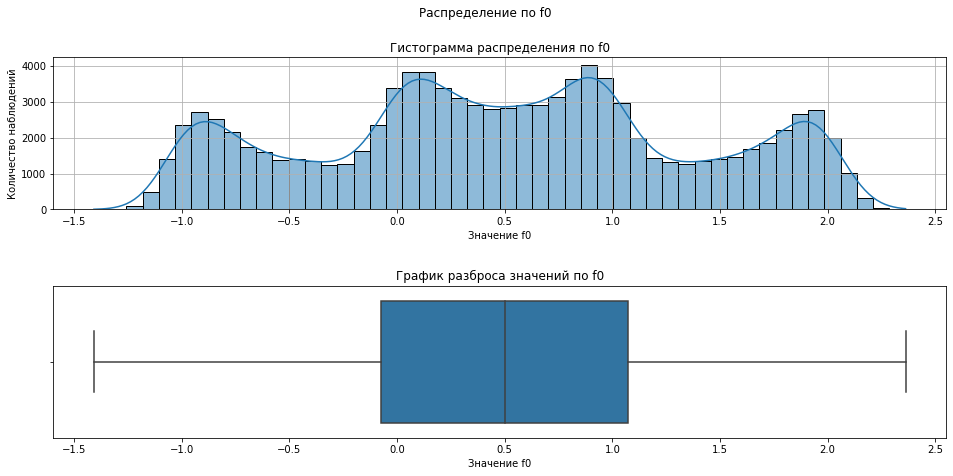

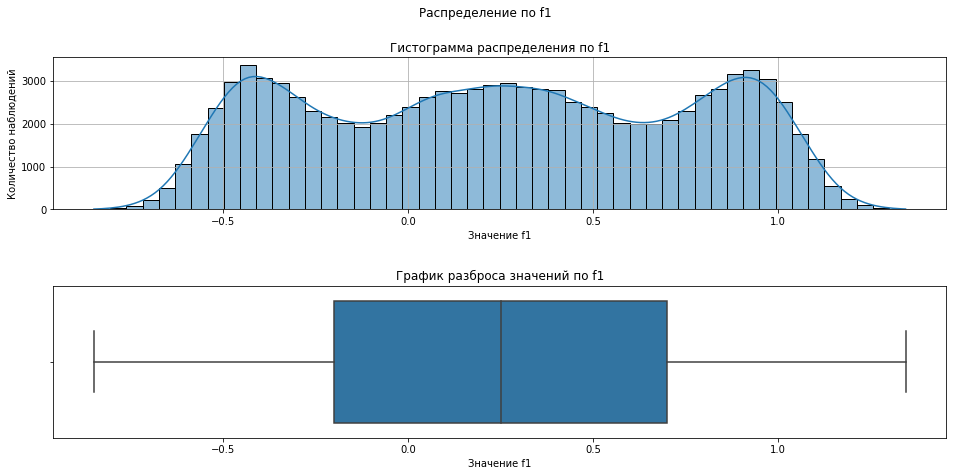

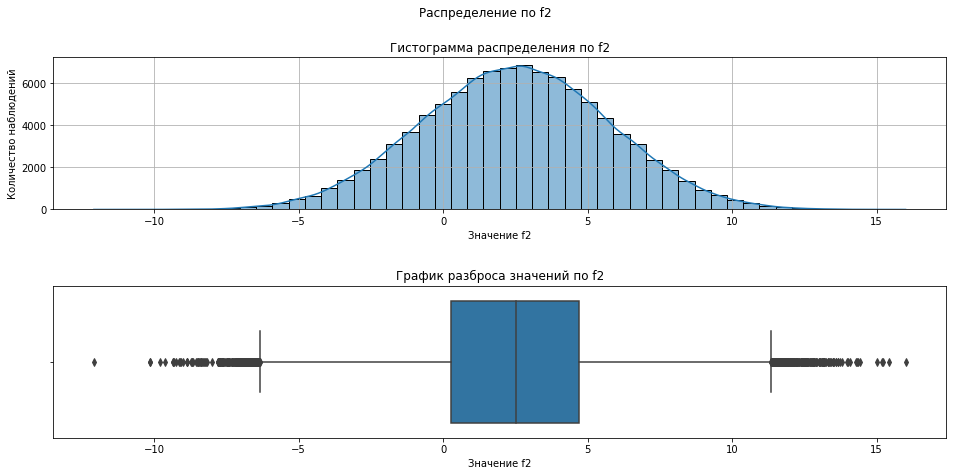

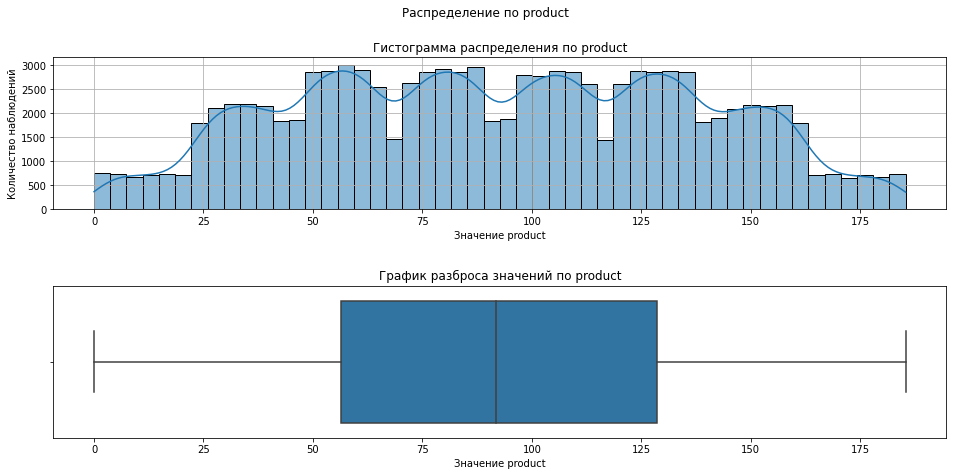

In [19]:
#Поскольку все признаки являются числовыми, кроме id, возьмем все столбцы кроме id
num_cols = list(geo_data_0.columns.drop('id'))

for col in num_cols:
    num_hist_box(geo_data_0, col)
display(geo_data_0.describe().T)

**Вывод**

По исследовательскому анализу для датасета `geo_data_0` можно сделать следующие выводы:
- Признак `fo`.
    - Признак `f0` имеет полимодальное, но при этом симметричное распределение со средним значением 0.5;
    - Выбросов не обнаружено.
- Признак `f1`.
    - Признак `f1` имеет полимодальное, но при этом симметричное распределение со средним значением 0.25;
    - Выбросов не обнаружено.
- Признак `f2`.
    - Признак `f2` имеет немного смещенное нормальное распределение со средним значение 2.5;
    - Имеются выбросы, но нельзя сказать являются ли они нормой или нет, так как неизместна специфика признака.
- Признак `product`.
    - Признак `product`  также имеет полимодальное, но при этом симметричное распределение со средним значением 92;
    - Выбросов не обнаружено.

### Датасет `geo_data_1`

,count,mean,std,min,25%,50%,75%,max
f0,99996.0,1.141209,8.965815,-31.609576,-6.298551,1.153055,8.620964,29.421755
f1,99996.0,-4.796608,5.119906,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,99996.0,2.494501,1.703579,-0.018144,1.000021,2.011475,3.999904,5.019721
product,99996.0,68.823916,45.944663,0.000000,26.953261,57.085625,107.813044,137.945408


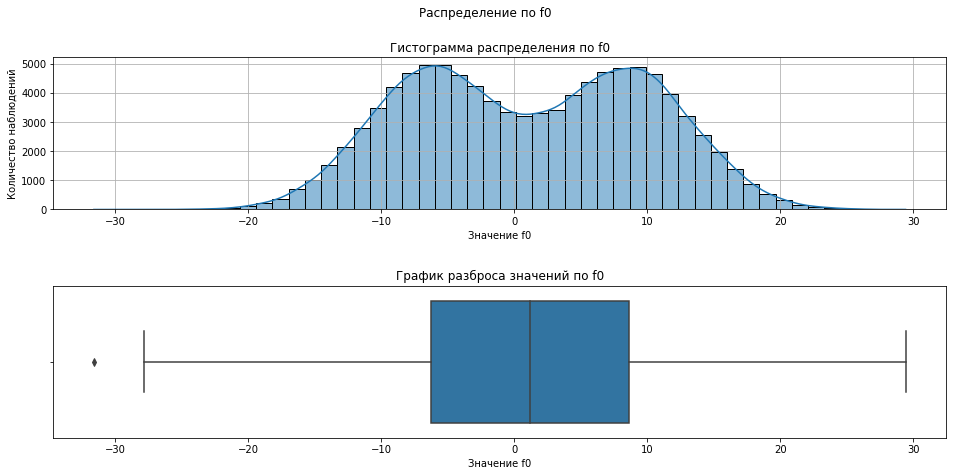

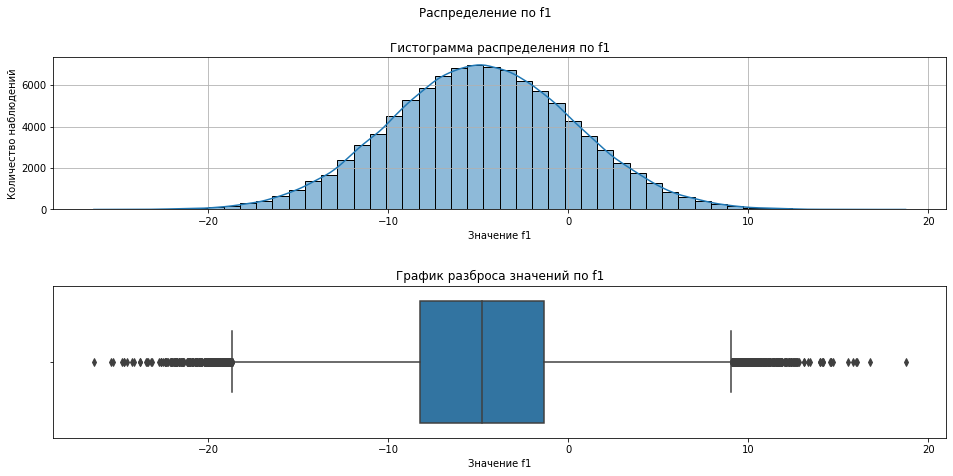

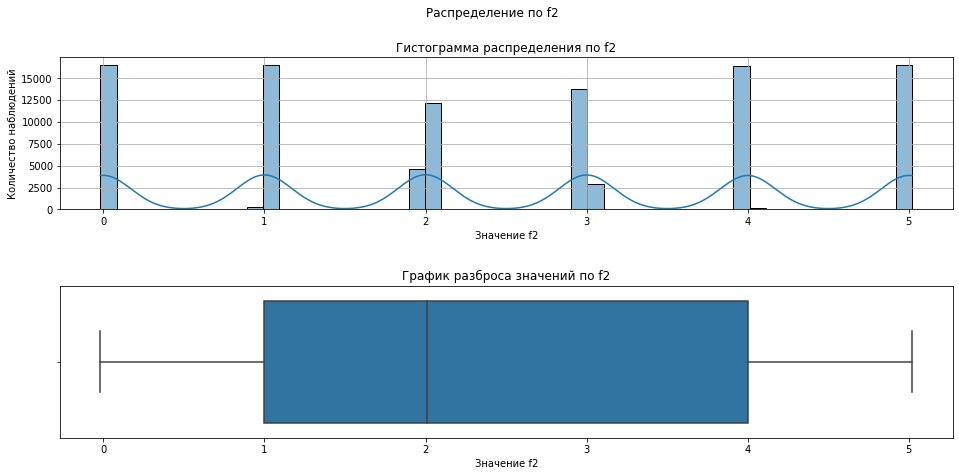

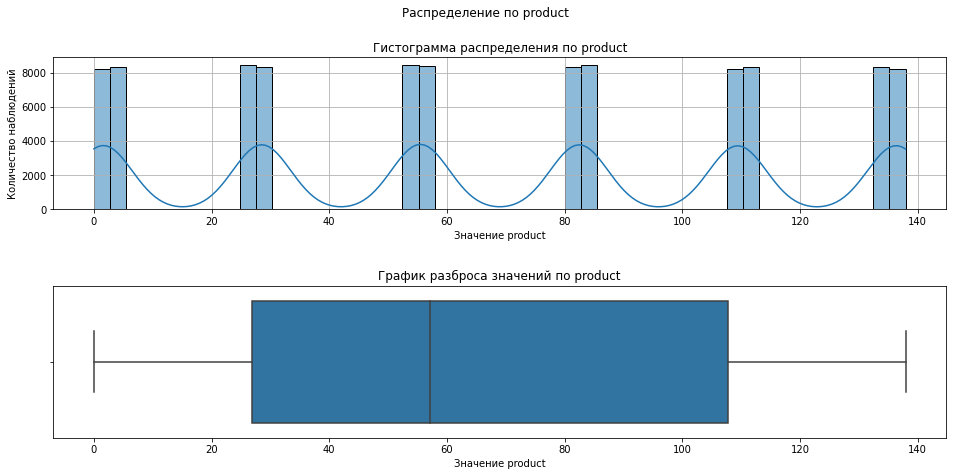

In [20]:
for col in num_cols:
    num_hist_box(geo_data_1, col)
display(geo_data_1.describe().T)

**Вывод**

По исследовательскому анализу для датасета `geo_data_1` можно сделать следующие выводы:
- Признак `fo`.
    - Признак `f0` имеет бимодальное симметричное распределение со средним значением 1.15;
    - Обнаружен один выброс, оставим его.
- Признак `f1`.
    - Признак `f1` имеет нормальное распределение со средним значением -4.8;
    - Имеется множество выбросов, оставим их, так как не знаем специфика признака.
- Признак `f2`.
    - Признак `f2` имеет полимодальное распределение, при этом пики распределения находятся в пределах целых чисел, но не совсем равны им;
    - Выбросов не обнаружено.
- Признак `product`.
    - Признак `product` имеет полимодальное распределение с группировкой значений около определенных целых чисел;
    - Выбросов не обнаружено.

### Датасет `geo_data_2`

,count,mean,std,min,25%,50%,75%,max
f0,99996.0,0.002002,1.732052,-8.760004,-1.162328,0.009424,1.158477,7.238262
f1,99996.0,-0.002159,1.730397,-7.084020,-1.174841,-0.009661,1.163523,7.844801
f2,99996.0,2.495084,3.473482,-11.970335,0.130269,2.484236,4.858720,16.739402
product,99996.0,94.998342,44.749573,0.000000,59.450028,94.925026,130.586815,190.029838


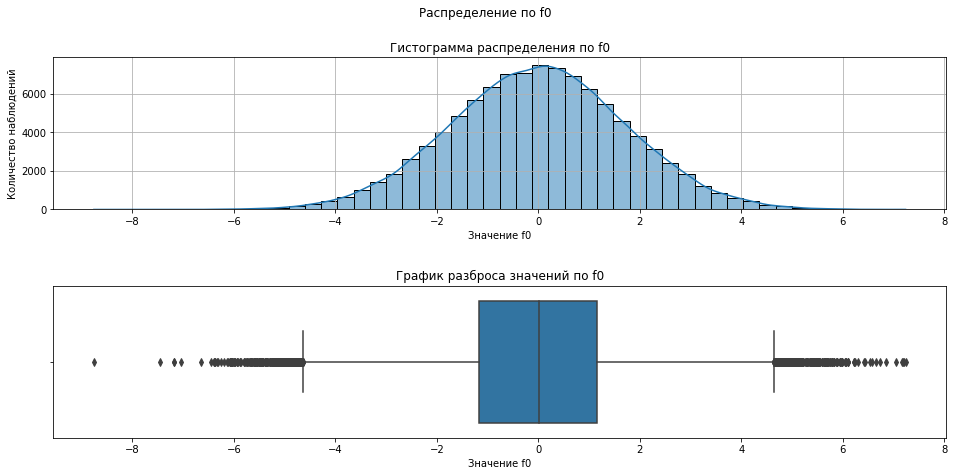

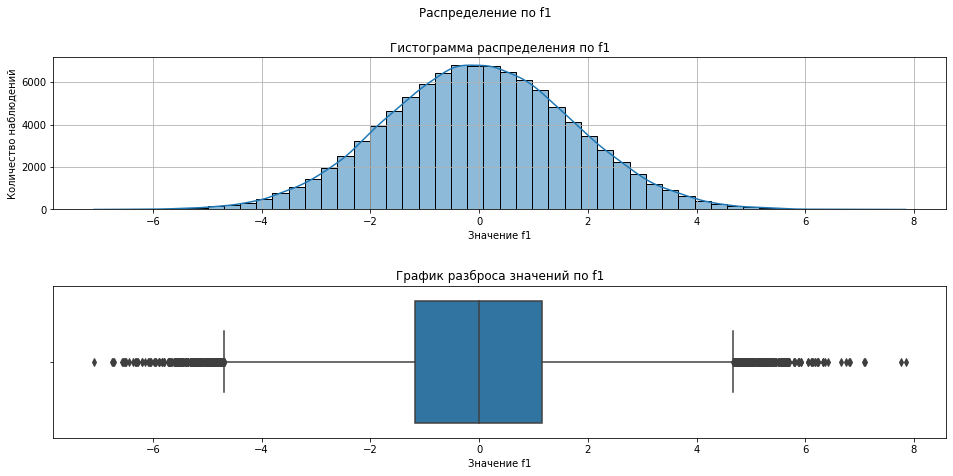

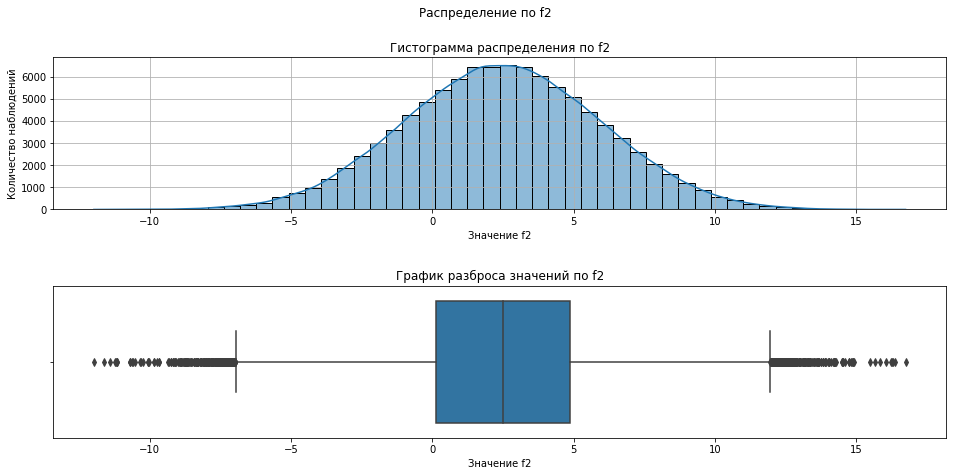

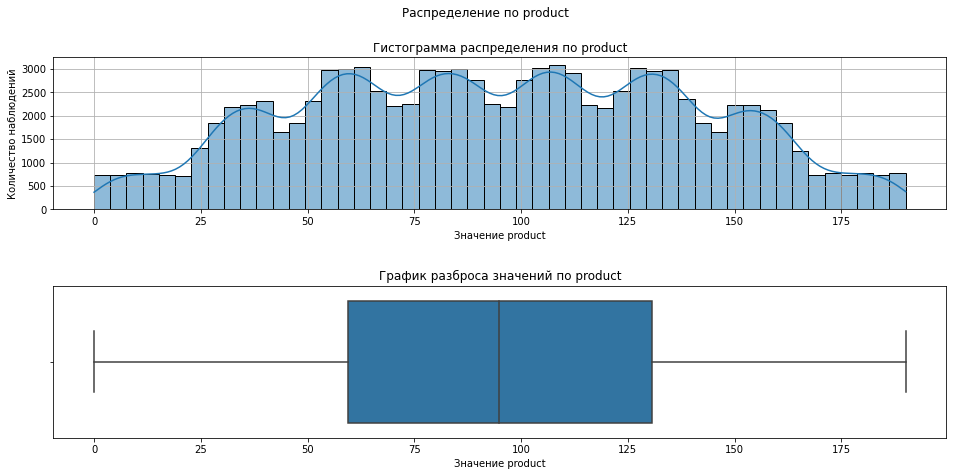

In [21]:
for col in num_cols:
    num_hist_box(geo_data_2, col)
display(geo_data_2.describe().T)

**Вывод**

По исследовательскому анализу для датасета `geo_data_2` можно сделать следующие выводы:
- Признак `fo`.
    - Признак `f0` имеет нормальное распределение со средним значением 0;
    - Выбросы оставляем.
- Признак `f1`.
    - Признак `f1` имеет нормальное распределение со средним значением 0;
    - Выбросы оставляем.
- Признак `f2`.
    - Признак `f2` имеет немного смещенное нормальное распределение со средним значение 2.5;
    - Выбросы оставялем.
- Признак `product`.
    - Признак `product` имеет полимодальное, но при этом симметричное распределение со средним значением 95;
    - Выбросов не обнаружено.

### Вывод

По исследовательскому анализу для  можно сделать следующие выводы:
- Датасет `geo_data_0`.
    - Признак `fo`.
        - Признак `f0` имеет полимодальное, но при этом симметричное распределение со средним значением 0.5;
        - Выбросов не обнаружено.
    - Признак `f1`.
        - Признак `f1` имеет полимодальное, но при этом симметричное распределение со средним значением 0.25;
        - Выбросов не обнаружено.
    - Признак `f2`.
        - Признак `f2` имеет немного смещенное нормальное распределение со средним значение 2.5;
        - Имеются выбросы, но нельзя сказать являются ли они нормой или нет, так как неизместна специфика признака.
    - Признак `product`.
        - Признак `product`  также имеет полимодальное, но при этом симметричное распределение со средним значением 92;
        - Выбросов не обнаружено.
- Датасет `geo_data_1`.
    - Признак `fo`.
        - Признак `f0` имеет бимодальное симметричное распределение со средним значением 1.15;
        - Обнаружен один выброс, оставим его.
    - Признак `f1`.
        - Признак `f1` имеет нормальное распределение со средним значением -4.8;
        - Имеется множество выбросов, оставим их, так как не знаем специфика признака.
    - Признак `f2`.
        - Признак `f2` имеет полимодальное распределение, при этом пики распределения находятся в пределах целых чисел, но не совсем равны им;
        - Выбросов не обнаружено.
    - Признак `product`.
        - Признак `product` имеет полимодальное распределение с группировкой значений около определенных целых чисел;
        - Выбросов не обнаружено.
- Датасет `geo_data_2`.
    - Признак `fo`.
        - Признак `f0` имеет нормальное распределение со средним значением 0;
        - Выбросы оставляем.
    - Признак `f1`.
        - Признак `f1` имеет нормальное распределение со средним значением 0;
        - Выбросы оставляем.
    - Признак `f2`.
        - Признак `f2` имеет немного смещенное нормальное распределение со средним значение 2.5;
        - Выбросы оставялем.
    - Признак `product`.
        - Признак `product` имеет полимодальное, но при этом симметричное распределение со средним значением 95;
        - Выбросов не обнаружено.
- **Общий вывод.**
    - Данные пригодны для дальнейшего исследования. Критических изменений не внесено. Признаки для разных регионов имеют разные виды распределений, выбросы были оставлены, так как неизвестна специфика признаков.

## Корреляционный анализ

Перед созданием моделей машинного обучения необходимо провести корреляционный анализ, чтобы выяснить с чем коррелирует целевой признак и есть ли линейно-зависимые переменные.

In [22]:
def graph_scatter(data, x, y):
    plt.figure(figsize=(5,5))
    sns.scatterplot(
        data=data,
        x=x,
        y=y)
    plt.title(f'График зависимости {x} от {y}')
    plt.show()

### Датасет `geo_data_0`

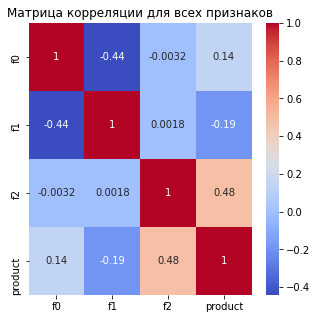

In [23]:
#Матрица корреляции со всеми признаками
plt.figure(figsize=(5, 5))
sns.heatmap(geo_data_0
    .drop('id', axis=1)
    .corr(),
    annot=True,
    cmap='coolwarm')
plt.title('Матрица корреляции для всех признаков')
plt.show();

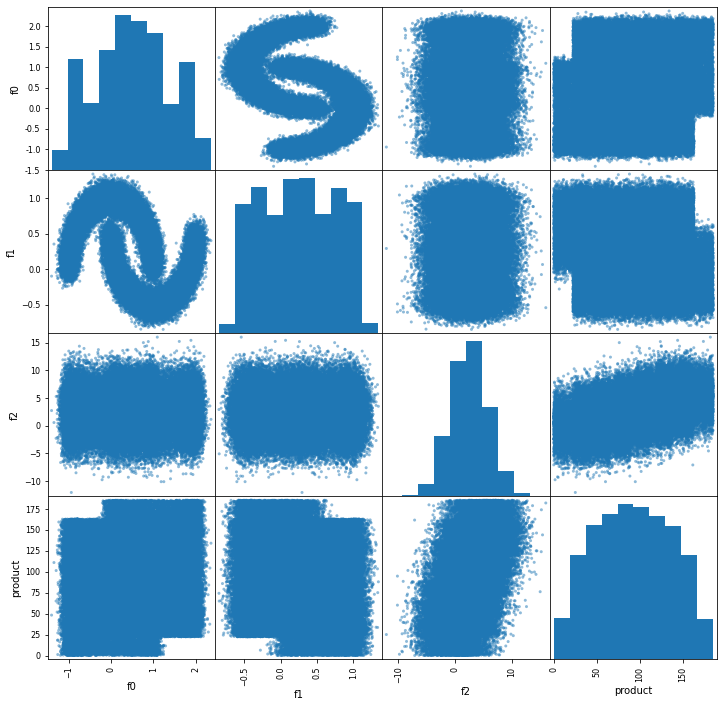

In [24]:
pd.plotting.scatter_matrix(
    geo_data_0
    .drop('id', axis=1),
    figsize=(12,12));

**Вывод**

Наблюдается слабая корреляция между признаками `f2` с целевым признаком `product`. Можно также заметить, что между признаками `f0` и `f1` имеется нелинейная связь со слабым коэффициентом корреляции -0.44.

### Датасет `geo_data_1`

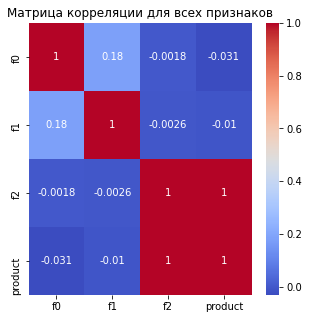

In [25]:
#Матрица корреляции со всеми признаками
plt.figure(figsize=(5, 5))
sns.heatmap(geo_data_1
    .drop('id', axis=1)
    .corr(),
    annot=True,
    cmap='coolwarm')
plt.title('Матрица корреляции для всех признаков')
plt.show();

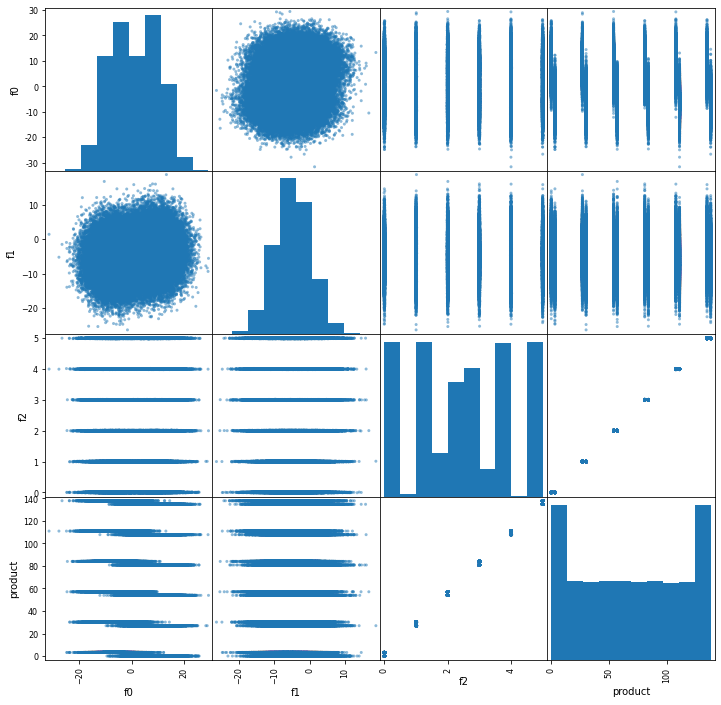

In [26]:
pd.plotting.scatter_matrix(
    geo_data_1
    .drop('id', axis=1),
    figsize=(12,12));

**Вывод**

Между признаком `f2` и `product` наблюдается весьма высокая корреляция, в связи с этим признак `f2` был возведен в квадрат для уменьшеия мультиколлинеарности. Добавление новых признаков, созданных на основе имеющихся результата не дали в уменьшении коэффициента корреляции между признаками. Также удаление признака `f2` сократит и без того небольшой набор признаков, что может привести к недообучению.

### Датасет `geo_data_2`

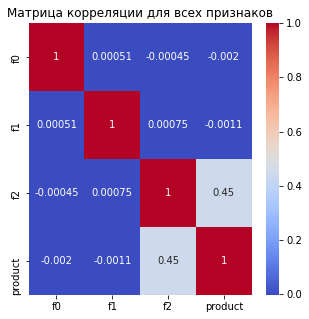

In [28]:
#Матрица корреляции со всеми признаками
plt.figure(figsize=(5, 5))
sns.heatmap(geo_data_2
    .drop('id', axis=1)
    .corr(),
    annot=True,
    cmap='coolwarm')
plt.title('Матрица корреляции для всех признаков')
plt.show();

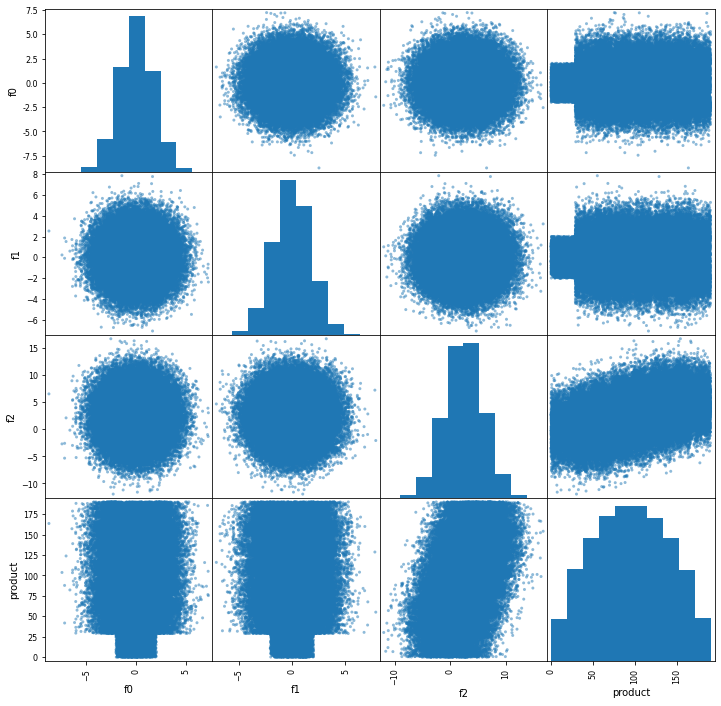

In [29]:
pd.plotting.scatter_matrix(
    geo_data_2
    .drop('id', axis=1),
    figsize=(12,12));

**Вывод**

Наблюдается умеренная корреляция признака `f2` и `product` (0.45).

### Вывод

По результатам корреляционного анализа можно сделать следующие выводы:
- Датасет `geo_data_0`.
    - Наблюдается слабая корреляция между признаками `f2` с целевым признаком `product`. Можно также заметить, что между признаками `f0` и `f1` имеется нелинейная связь со слабым коэффициентом корреляции -0.44.
- Датасет `geo_data_1`.
    - Между признаком `f2` и `product` наблюдается весьма высокая корреляция, но было принято решение оставить его.
- Датасет `geo_data_2`.
    - Наблюдается умеренная корреляция признака `f2` и `product` (0.45).

## Обучение и проверка модели

In [30]:
def predict_reserve(data):
    model_lr = LinearRegression()
    X = data.drop(['id', 'product'], axis=1)
    y = data['product']
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model_lr.fit(X_train_scaled, y_train)
    preds = model_lr.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, preds, squared=False)
    mae = mean_absolute_error(y_test, preds)
    mean_real = y_test.mean()
    mean_preds = preds.mean()
    print(f'Средний объем реальных запасов: {mean_real}')
    print(f'Средний объем предсказанных запасов: {mean_preds}')
    print(f'RMSE модели: {rmse}')
    print(f'MAE модели: {mae}')
    
    return preds, y_test

### Датасет `geo_data_0`

In [31]:
preds_0, y_test_0 = predict_reserve(geo_data_0)

Средний объем реальных запасов: 92.38876593595461
Средний объем предсказанных запасов: 92.60984027552017
RMSE модели: 37.68508926201444
MAE модели: 31.033456577971297


### Датасет `geo_data_1`

In [32]:
preds_1, y_test_1 = predict_reserve(geo_data_1)

Средний объем реальных запасов: 68.58361591061642
Средний объем предсказанных запасов: 68.57703454115173
RMSE модели: 0.8928265978121422
MAE модели: 0.7184427882220303


### Датасет `geo_data_2`

In [33]:
preds_2, y_test_2 = predict_reserve(geo_data_2)

Средний объем реальных запасов: 95.25463671658842
Средний объем предсказанных запасов: 94.93478722287514
RMSE модели: 40.080822438088305
MAE модели: 32.839076508104725


### Сравнение регионов

,mean_product,region
0,92.609840,0
1,68.577035,1
2,94.934787,2


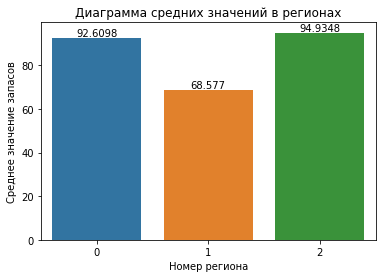

In [34]:
reserves = pd.DataFrame([preds_0.mean(), preds_1.mean(), preds_2.mean()], columns=['mean_product'])
reserves['region'] = reserves.index

display(reserves)

ax = sns.barplot(data=reserves, y='mean_product', x='region')
ax.set(
    title='Диаграмма средних значений в регионах',
    xlabel='Номер региона',
    ylabel='Среднее значение запасов')
for i in ax.containers:
    ax.bar_label(i,)

### Вывод

В ходе работы с моделью линейной регрессии можно сделать следующие выводы:
- Были получены 3 модели линейной регрессии для каждого региона;
- Регион 0.
    - Средний объем реальных запасов: 92.39;
    - Средний объем предсказанных запасов: 92.55;
    - RMSE модели: 39.89;
    - MAE модели: 33.21.
- Регион 1.
    - Средний объем реальных запасов: 68.58;
    - Средний объем предсказанных запасов: 68.58;
    - RMSE модели: 0.89;
    - MAE модели: 0.72.
- Регион 2.
    - Средний объем реальных запасов: 95.25;
    - Средний объем предсказанных запасов: 94.93;
    - RMSE модели: 40.1;
    - MAE модели: 32.84.

## Расчет прибыли и рисков

### Подготовка к расчету

In [35]:
BUDGET = 10_000_000_000
MAX_POINTS = 500
BEST_POINTS = 200
PRICE = 450_000
TRESHOLD = 0.025

enough_volume = BUDGET / PRICE / BEST_POINTS
print(f'Достаточный объем сырья для одной скважины равен {enough_volume}')

Достаточный объем сырья для одной скважины равен 111.11111111111111


**Вывод**

Достаточный объем сырья для одной скважины превышает средние значения запасов каждом регионе.

### Выбор скважин с максимальными значениями

In [36]:
def enough_points(prediction_value, threshold_value):
    points_number = sum(prediction_value > threshold_value)
    points_percent = round((prediction_value > threshold_value).mean() * 100, 2)
    return points_number, points_percent

In [37]:
print(f'В 0 регионе количество скважин с достаточным объемом сырья ({int(enough_volume)} тыс. баррелей) \
составляет {enough_points(preds_0, enough_volume)[0]}({enough_points(preds_0, enough_volume)[1]}%)')
print(f'В 1 регионе количество скважин с достаточным объемом сырья ({int(enough_volume)} тыс. баррелей) \
составляет {enough_points(preds_1, enough_volume)[0]}({enough_points(preds_1, enough_volume)[1]}%)')
print(f'В 2 регионе количество скважин с достаточным объемом сырья ({int(enough_volume)} тыс. баррелей) \
составляет {enough_points(preds_2, enough_volume)[0]}({enough_points(preds_2, enough_volume)[1]}%)')

В 0 регионе количество скважин с достаточным объемом сырья (111 тыс. баррелей) составляет 5301(21.21%)
В 1 регионе количество скважин с достаточным объемом сырья (111 тыс. баррелей) составляет 4570(18.28%)
В 2 регионе количество скважин с достаточным объемом сырья (111 тыс. баррелей) составляет 5225(20.9%)


В целом видно, что несмотря на средние показатели ниже достаточных, во всех регионах имеется около 20% приемлемых скважин.

### Расчет прибыли

In [38]:
def max_points_income(target_values, prediction_values):
    sorted_prediction = prediction_values.sort_values(ascending=False)
    selected = target_values[sorted_prediction.index][:BEST_POINTS]
    return selected.sum() * PRICE - BUDGET

In [39]:
region_0 = max_points_income(y_test_0, pd.Series(preds_0, index=y_test_0.index))
region_1 = max_points_income(y_test_1, pd.Series(preds_1, index=y_test_1.index))
region_2 = max_points_income(y_test_2, pd.Series(preds_2, index=y_test_2.index))

In [40]:
print(f'Прибыль с 200 скважин в 0 регионе равна {region_0/1e6:,.1f} млн')
print(f'Прибыль с 200 скважин в 1 регионе равна {region_1/1e6:,.1f} млн')
print(f'Прибыль с 200 скважин в 2 регионе равна {region_2/1e6:,.1f} млн')

Прибыль с 200 скважин в 0 регионе равна 3,468.5 млн
Прибыль с 200 скважин в 1 регионе равна 2,415.1 млн
Прибыль с 200 скважин в 2 регионе равна 2,396.6 млн


### Расчет рисков

In [41]:
def bootstrap_geo(target, probas):
    state = np.random.RandomState(12345)
    values=[]
    for i in range(1000):
        target_subsample = target.sample(replace=True,\
            random_state=state, n=MAX_POINTS)

        probs_subsample = probas[target_subsample.index]
        values.append(max_points_income(target_subsample, probs_subsample))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = st.percentileofscore(values, 0)

    sns.histplot(values)
    plt.xlabel('Прибыль')
    plt.axvline(x=mean, color='black', ls='-', lw=2, label='Средняя прибыль')
    plt.axvline(x=lower, color='r', ls=':', lw=2, label='95%-й доверительный интервал')
    plt.axvline(x=upper, color='r', ls=':', lw=2)
    plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
    plt.show()
    
    return lower, upper, mean, risk

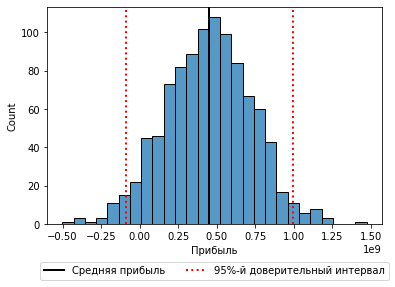

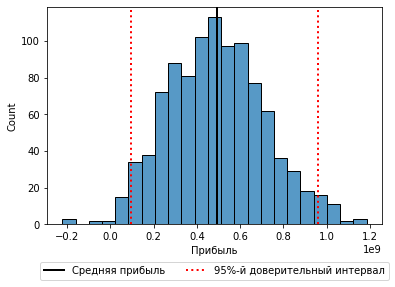

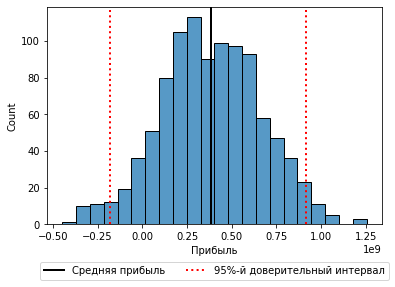

,регион_0,регион_1,регион_2
средняя_прибыль,447.5 млн,491.1 млн,383.8 млн
доверительный_интервал,-91.0 - 997.5 млн,95.2 - 960.1 млн,-180.2 - 917.0 млн
риск,5.300000000000001%,0.7000000000000001%,7.800000000000001%


In [42]:
lower_0, upper_0, mean_0, risk_0 = bootstrap_geo(y_test_0, pd.Series(preds_0, index=y_test_0.index))
lower_1, upper_1, mean_1, risk_1 = bootstrap_geo(y_test_1, pd.Series(preds_1, index=y_test_1.index))
lower_2, upper_2, mean_2, risk_2 = bootstrap_geo(y_test_2, pd.Series(preds_2, index=y_test_2.index))

data_t = {
    'средняя_прибыль': [
        f'{mean_0/1e6:,.1f} млн', 
        f'{mean_1/1e6:,.1f} млн', 
        f'{mean_2/1e6:,.1f} млн'],
    'доверительный_интервал': [
        f'{lower_0/1e6:,.1f} - {upper_0/1e6:,.1f} млн',
        f'{lower_1/1e6:,.1f} - {upper_1/1e6:,.1f} млн',
        f'{lower_2/1e6:,.1f} - {upper_2/1e6:,.1f} млн'],
    'риск': [
        f'{risk_0}%',
        f'{risk_1}%',
        f'{risk_2}%']
}
result_table = pd.DataFrame(data_t, index=['регион_0', 'регион_1', 'регион_2'])
display(result_table.T)

### Вывод

В ходе расчетов прибыли и рисков были получены следующие результаты:

- Регион 0.
    - В 0 регионе количество скважин с достаточным объемом сырья (111 тыс. баррелей) составляет 5301(21.21%);
    - Прибыль с 200 скважин в 0 регионе равна 3,468.5 млн;
    - По технологии Bootstrap средняя прибыль составила 447.5 млн, доверительный интервал равен -91.0 - 997.5 млн, а риск составил 5.3%.

- Регион 1.
    - В 1 регионе количество скважин с достаточным объемом сырья (111 тыс. баррелей) составляет 4526(18.1%);
    - Прибыль с 200 скважин в 1 регионе равна 2,415.1 млн;
    - По технологии Bootstrap средняя прибыль составила 515.7 млн, доверительный интервал равен 118.0 - 914.3 млн, а риск составил 0.8%.

- Регион 2.
    - В 2 регионе количество скважин с достаточным объемом сырья (111 тыс. баррелей) составляет 5260(21.04%);
    - Прибыль с 200 скважин в 2 регионе равна 2,708.1 млн;
    - По технологии Bootstrap средняя прибыль составила 404.4 млн, доверительный интервал равен -156.8 - 1007.7 млн, а риск составил 6.7%.
    
- Общий вывод.
    - Для разработки приоритетным является 0 регион, поскольку он имеет наибольшую прибыль и минимальные риски.

## Общий вывод

В ходе проведенного исследования был проделан следующий ряд работ и сделаны следующие выводы:


1. Открыт и изучен файл

    - Датасет `geo_data_0`:
        - Всего в датасете 10000 строк и 5 столбцов;
        - Названия столбцов приведены к единому стилю;
        - Явные пропуски не обнаружены;
        - Данные имеют верный тип;
        - Необходимо проверить данные на дубликаты;
        - Явных выбросов не обнаружено.
    
    - Датасет `geo_data_1`:
        - Всего в датасете 10000 строк и 5 столбцов;
        - Названия столбцов приведены к единому стилю;
        - Явные пропуски не обнаружены;
        - Данные имеют верный тип;
        - Необходимо проверить данные на дубликаты;
        - Явных выбросов не обнаружено.

    - Датасет `geo_data_2`:
        - Всего в датасете 10000 строк и 5 столбцов;
        - Названия столбцов приведены к единому стилю;
        - Явные пропуски не обнаружены;
        - Данные имеют верный тип;
        - Необходимо проверить данные на дубликаты;
        - Явных выбросов не обнаружено.
        
    - Данные были признаны пригодными для исследования.
    
    
2. Проведена предобработка данных:
    - Датасет `geo_data_0`:
        - Обработаны дубликаты (вероятно, техническая проблема).
    - Датасет `geo_data_1`:
        - Обработаны дубликаты (вероятно, техническая проблема).
    - Датасет `geo_data_2`:
        - Обработаны дубликаты (вероятно, техническая проблема).
        
        
3. Проведен исследовательский анализ данных:
    - Датасет `geo_data_0`.
        - Признак `fo`.
            - Признак `f0` имеет полимодальное, но при этом симметричное распределение со средним значением 0.5;
            - Выбросов не обнаружено.
        - Признак `f1`.
            - Признак `f1` имеет полимодальное, но при этом симметричное распределение со средним значением 0.25;
            - Выбросов не обнаружено.
        - Признак `f2`.
            - Признак `f2` имеет немного смещенное нормальное распределение со средним значение 2.5;
            - Имеются выбросы, но нельзя сказать являются ли они нормой или нет, так как неизместна специфика признака.
        - Признак `product`.
            - Признак `product`  также имеет полимодальное, но при этом симметричное распределение со средним значением 92;
            - Выбросов не обнаружено.
    - Датасет `geo_data_1`.
        - Признак `fo`.
            - Признак `f0` имеет бимодальное симметричное распределение со средним значением 1.15;
            - Обнаружен один выброс, оставим его.
        - Признак `f1`.
            - Признак `f1` имеет нормальное распределение со средним значением -4.8;
            - Имеется множество выбросов, оставим их, так как не знаем специфика признака.
        - Признак `f2`.
            - Признак `f2` имеет полимодальное распределение, при этом пики распределения находятся в пределах целых чисел, но не совсем равны им;
            - Выбросов не обнаружено.
        - Признак `product`.
            - Признак `product` имеет полимодальное распределение с группировкой значений около определенных целых чисел;
            - Выбросов не обнаружено.
    - Датасет `geo_data_2`.
        - Признак `fo`.
            - Признак `f0` имеет нормальное распределение со средним значением 0;
            - Выбросы оставляем.
        - Признак `f1`.
            - Признак `f1` имеет нормальное распределение со средним значением 0;
            - Выбросы оставляем.
        - Признак `f2`.
            - Признак `f2` имеет немного смещенное нормальное распределение со средним значение 2.5;
            - Выбросы оставялем.
        - Признак `product`.
            - Признак `product` имеет полимодальное, но при этом симметричное распределение со средним значением 95;
            - Выбросов не обнаружено.
    - Общий вывод.
        - Данные пригодны для дальнейшего исследования. Критических изменений не внесено. Признаки для разных регионов имеют разные виды распределений, выбросы были оставлены, так как неизвестна специфика признаков.
    
    
4. Проведен корреляционный анализ:
    - Датасет `geo_data_0`.
        - Наблюдается слабая корреляция между признаками `f2` с целевым признаком `product`. Можно также заметить, что между признаками `f0` и `f1` имеется нелинейная связь со слабым коэффициентом корреляции -0.44.
    - Датасет `geo_data_1`.
        - Между признаком `f2` и `product` наблюдается весьма высокая корреляция, но было принято решение оставить его.
    - Датасет `geo_data_2`.
        - Наблюдается умеренная корреляция признака `f2` и `product` (0.45).

    
5. Построены и обучены модели машинного обучения:
    - Были получены 3 модели линейной регрессии для каждого региона;
    - Регион 0.
        - Средний объем реальных запасов: 92.39;
        - Средний объем предсказанных запасов: 92.55;
        - RMSE модели: 39.89;
        - MAE модели: 33.21.
    - Регион 1.
        - Средний объем реальных запасов: 68.58;
        - Средний объем предсказанных запасов: 68.58;
        - RMSE модели: 0.89;
        - MAE модели: 0.72.
    - Регион 2.
        - Средний объем реальных запасов: 95.25;
        - Средний объем предсказанных запасов: 94.93;
        - RMSE модели: 40.1;
        - MAE модели: 32.84.
    

6. Проведен расчет прибыли и рисков:
    - Регион 0.
        - В 0 регионе количество скважин с достаточным объемом сырья (111 тыс. баррелей) составляет 5301(21.21%);
        - Прибыль с 200 скважин в 0 регионе равна 3,468.5 млн;
        - По технологии Bootstrap средняя прибыль составила 447.5 млн, доверительный интервал равен -91.0 - 997.5 млн, а риск составил 5.3%.

    - Регион 1.
        - В 1 регионе количество скважин с достаточным объемом сырья (111 тыс. баррелей) составляет 4526(18.1%);
        - Прибыль с 200 скважин в 1 регионе равна 2,415.1 млн;
        - По технологии Bootstrap средняя прибыль составила 515.7 млн, доверительный интервал равен 118.0 - 914.3 млн, а риск составил 0.8%.

    - Регион 2.
        - В 2 регионе количество скважин с достаточным объемом сырья (111 тыс. баррелей) составляет 5260(21.04%);
        - Прибыль с 200 скважин в 2 регионе равна 2,708.1 млн;
        - По технологии Bootstrap средняя прибыль составила 404.4 млн, доверительный интервал равен -156.8 - 1007.7 млн, а риск составил 6.7%.

    - Общий вывод.
        - Для разработки приоритетным является 0 регион, поскольку он имеет наибольшую прибыль и минимальные риски.
        
9. Итоговый вывод:
    - В результате исследования приоритетным регионом для разработки является первый регион. Он показал наибольшую среднюю прибыль и минимальные риски. Однако максимальная прибыль с 200 скважин будет в регионе 0, но при этом риски в нем выше. Для более подробного исследования нулевого региона необходимы дополнительные данные.